![Picture](images/)

# Music Mood Detection Using Spotify Audio Features

**Authors:** James Meredith
***

## Overview

The purpose of this Data Science project was to develop an automated Machine Learning model for the detection of a song's dominant mood based on it's audio features. The impetus behind conception of this project was to create a way for the Spotify recommendation system to implement mood-based contextual recommendation into the current recommendation system. The current recommendation system does a pretty good job of utilizing users past listening habits to recommend them songs they enjoy, but it lacks the context specificity to recommend songs appropriate to a user’s given mood. For example, I don’t want Spotify to include sad songs in my recommended playlist when I’m at the gym, or fast-paced techno music when I’m trying to fall asleep. So the goal of this project was to create an automated mood detection algorithm to be integrated into the current recommendation system, so users could simply say “Hey Spotify! Build me a playlist that matches my mood right now.” and Spotify does it. Song data was compiled from the Spotify API and emotion data used to train the model came from Last.FM user-generated tags. The data was then used to train a machine learning algorithm in order to build the detection model.  The logistic regression model had an accuracy score of 0.54. The decision tree model was also able to predict the dominant mood of a song with a 0.45 accuracy score. After tuning both models further, the decision tree model was able to achieve an accuracy score of 0.85, and the logistic regression model was able to achieve an accuracy score of 0.55. The decision tree model was also able to predict the dominant mood of a song with a 0.46 accuracy score. Based on the analysis, the author recommends the use of audio feature data to predict the dominant mood of a song. The author also recommends the use of a decision tree model to predict the dominant mood of a song based on it's audio features. The author does not recommend the use of a logistic regression model to predict the dominant mood of a song based on it's audio features.


## Business Problem

Spotify currently offers a robust recommendation system whereby users receive recommendations for music they might like based on their past listening habits. However, Spotify does not currently offer a feature whereby users can request music based on their current mood. The purpose of this project is to develop a model that can predict the dominant mood of a song based on it's audio features, and then to use that model to develop a recommendation system for users to request music based on their current mood. The target audience for this project is Spotify, and the goal is to develop a model that can be integrated into the current recommendation system to allow users to request music based on their current mood.

## Data

Song data was compiled using a dataset derived from the Spotify API. The database contained of over 1700 songs, and features mood data from Last.FM user-generated tags.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

In [184]:
# Loads the dataset
df = pd.read_csv('./data/song_data.csv')

In [185]:
# Views the dataset
df.head()

,f_name,a_name,title,lyrics,spot_id,sr_json,tempo,energy,danceability,loudness,valence,acousticness,tr_json,mood
0,angry_all/50 Ft Queenie.mp3,PJ Harvey,50 Ft Queenie,Hey I'm one big queen No one can stop me Red ...,3fJprjhRxTVtOp18EHdNfu,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",126.366,0.667,0.382,-16.077,0.718,0.000652,"{\n ""acousticness"": 0.000652,\n ""analysis_url""...",1
1,angry_all/A Bad Dream.mp3,Keane,A Bad Dream,Why do I have to fly over every town up and do...,17ScnUBsr3CgfJGd7k0kAZ,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",145.035,0.760,0.405,-4.852,0.316,0.008240,"{\n ""acousticness"": 0.00824,\n ""analysis_url"":...",1
2,angry_all/Agenda Suicide (Jagz Kooner Remix).mp3,The Faint,Agenda Suicide,You could follow logic Or contest it all The w...,4Mhj9IjSxTOOWGCS5MbBG4,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",144.585,0.703,0.574,-7.789,0.275,0.006580,"{\n ""acousticness"": 0.00658,\n ""analysis_url"":...",1
3,angry_all/Alternative Ulster.mp3,Stiff Little Fingers,Alternative Ulster,There's nothin' for us in Belfast The Pound's ...,0MDJjySh4ydA8CyFVkcFQh,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",118.181,0.925,0.600,-9.148,0.382,0.008820,"{\n ""acousticness"": 0.00882,\n ""analysis_url"":...",1
4,angry_all/Animal Instinct.mp3,The Cranberries,Animal Instinct,Suddenly something has happened to me As I was...,3J58Ccc5iTbCRnYx2xjo6d,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",132.145,0.823,0.622,-5.381,0.605,0.094600,"{\n ""acousticness"": 0.0946,\n ""analysis_url"": ...",1


In [186]:
# Views and overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   f_name        1776 non-null   object 
 1   a_name        1776 non-null   object 
 2   title         1776 non-null   object 
 3   lyrics        1776 non-null   object 
 4   spot_id       1776 non-null   object 
 5   sr_json       1776 non-null   object 
 6   tempo         1776 non-null   float64
 7   energy        1776 non-null   float64
 8   danceability  1776 non-null   float64
 9   loudness      1776 non-null   float64
 10  valence       1776 non-null   float64
 11  acousticness  1776 non-null   float64
 12  tr_json       1776 non-null   object 
 13  mood          1776 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 194.4+ KB


In [187]:
# Description of the numeric data
df.describe()

,tempo,energy,danceability,loudness,valence,acousticness,mood
count,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000
mean,125.065478,0.637407,0.515200,-8.658334,0.459322,0.257100,1.495495
std,29.567663,0.257511,0.163382,4.052949,0.254182,0.320999,1.114808
min,38.802000,0.016400,0.078600,-28.043000,0.033100,0.000002,0.000000
25%,102.911000,0.439000,0.413750,-10.843750,0.241750,0.003845,1.000000
50%,123.687000,0.675500,0.519000,-7.942500,0.429000,0.074100,1.000000
75%,142.341000,0.860000,0.619250,-5.515500,0.675000,0.494500,2.000000
max,207.673000,0.999000,0.966000,-1.017000,0.986000,0.994000,3.000000


In [188]:
# Views the balance of the mood classes
# Mood codes for the dataset are as follows: 0:'Happy', 1:'Angry', 2:'Sad', 3:'Relaxed'
df['mood'].value_counts(normalize=True).sort_index()

0    0.246622
1    0.260698
2    0.243243
3    0.249437
Name: mood, dtype: float64

**Discussion: The data at a glance**
- We can note that the initial balance of each mood class is quite good as we have a good amount of data for each mood

**Limitations of the data:**
- We're using a dataset that uses audio feature metrics created by Spotify in their API. This is a limitation because it's somewhat opaque how each audio feature is calculated, and it's possible that the audio features are not representative of the actual audio features of the song. This project assumes that the audio features are accurate and representative of the actual audio features of the song.
- We're using user-generated tags from Last.FM to determine the dominant mood of a song. This is a limitation because it's possible that the tags are not accurate, or that the tags are not representative of the dominant mood of the song. This project assumes that the tags are accurate and representative of the dominant mood of the song.


## Data Preparation

Songs were tagged with one of 4 moods: happy, sad, angry, and calm. All columns containing non-numeric data unessential to training the model were dropped. The dataset contained no nulls. The data was then split into a training set and a test set, with the training set containing 80% of the data, and the test set containing 20% of the data. The training set was used to train the model, and the test set was used to test the model. The data was then used to train a machine learning algorithm in order to build the detection model.

In [189]:
# Creates of list of the mood classes
# Mood codes for the dataset are as follows: 0:'Happy', 1:'Angry', 2:'Sad', 3:'Relaxed'
mood_list = ['Happy', 'Angry', 'Sad', 'Relaxed']

In [139]:
# Preparing columns to drop out of X
columns_to_drop=df.columns[0:6].tolist()
columns_to_drop.append(df.columns[-2])
columns_to_drop.append(df.columns[-1])

### Performing the Initial Train-Test Split

In [140]:
# Splits the dataset into training and testing sets
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['mood']  # Emotion labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
X

,tempo,energy,danceability,loudness,valence,acousticness
0,126.366,0.667,0.382,-16.077,0.718,0.000652
1,145.035,0.760,0.405,-4.852,0.316,0.008240
2,144.585,0.703,0.574,-7.789,0.275,0.006580
3,118.181,0.925,0.600,-9.148,0.382,0.008820
4,132.145,0.823,0.622,-5.381,0.605,0.094600
...,...,...,...,...,...,...
1771,136.924,0.286,0.434,-10.803,0.122,0.533000
1772,137.928,0.605,0.536,-6.231,0.156,0.129000
1773,122.979,0.137,0.424,-15.580,0.288,0.909000
1774,190.714,0.285,0.326,-9.377,0.455,0.841000


In [142]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1771    3
1772    3
1773    3
1774    3
1775    3
Name: mood, Length: 1776, dtype: int64

## Data Modeling

The detection model was created using an iterative approach that compared the accuracy and efficiency of several different machine learning models against a baseline dummy model. Pipelines were used to efficiently process the data for each model. The models were then tuned using GridSearchCV to find the optimal hyperparameters for each model. The models were then evaluated using accuracy scores and confusion matrices.

### Creating Pipeline to Prepare for Modeling

In [143]:
# Creating Pipelines
subpipe_numerics = Pipeline(steps = [
	('ss', StandardScaler())
])

In [144]:
# Creating a Column Transformer
CT = ColumnTransformer(transformers=[
	('subpipe_numerics', subpipe_numerics,selector(dtype_include=np.number))
], remainder='passthrough')

### Creating the Baseline Dummy Model

In [43]:
# Creates a Pipeline for the Dummy Baseline Model
dummy_model_pipe = Pipeline(steps = [
	('ct',CT),
	('baseline', DummyClassifier(strategy='most_frequent'))
])

In [44]:
# Trains the model on the training data
dummy_model_pipe.fit(X_train, y_train)  

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB0C8E6D0>)])),
                ('baseline', DummyClassifier(strategy='most_frequent'))])

In [45]:
# Returns the mean accuracy score of the model based on the given training data and labels
dummy_model_pipe.score(X_train, y_train)

0.2549295774647887

In [46]:
# Returns the mean accuracy score of the model based on the given testing data and labels
dummy_model_pipe.score(X_test, y_test)

0.28370786516853935

In [102]:
# Creating a custom function to calculate the accuracy score of the model
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

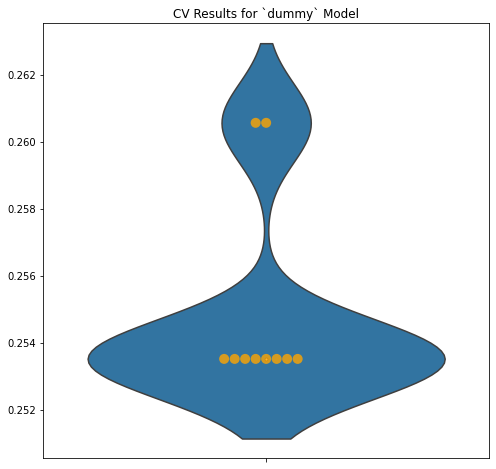

In [48]:
# Creates a Cross-validated accuracy graph for the Dummy Baseline Model
dummy_pipe = ModelWithCV(
	dummy_model_pipe,
	model_name='dummy',
	X=X_train,
	y=y_train)

fig, ax = plt.subplots(figsize=(8,8))

dummy_pipe.plot_cv(ax=ax);

Accuracy: 0.28370786516853935
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.28      1.00      0.44       101
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00        96

    accuracy                           0.28       356
   macro avg       0.07      0.25      0.11       356
weighted avg       0.08      0.28      0.13       356



c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


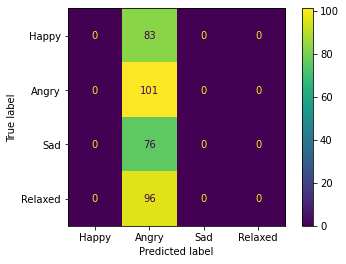

In [49]:
# Baseline Evaluation of the model
y_pred = dummy_pipe.model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

### Where to Go From Here
- From here we'll quickly assess other possible alternative models to see if we can find a better model than the baseline dummy model.

### Quickly Assessing Possible Alternative Models
- We'll loop through a few different models to see if we can improve on the performance of the first simple model here.

In [50]:
# Creates variables of commonly used models
dum_model = DummyClassifier(strategy='most_frequent')
lr_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()
mlp_model = MLPClassifier()
svc_model = SVC()

# Creates a list of the models to be used
model_list = [('dummy', dum_model), ('logreg', lr_model), ('dt', tree_model), ('knn', knn_model), ('rf', rf_model), ('ada', ada_model), ('gb', gb_model), ('mlp', mlp_model), ('svc', svc_model)]

In [51]:
# Creates a Pipeline for each model in the model list, and returns a cross-validated accuracy score summary for each model
for name, model in model_list:
    loop_model_pipe = Pipeline(steps = [
        ('ct',CT),
        (name, model)
    ])

    loop_model_pipe.fit(X_train, y_train)

    loop_model_pipe = ModelWithCV(
        loop_model_pipe,
        model_name=name,
        X=X_test,
        y=y_test)
    loop_model_pipe.print_cv_summary()

CV Results for `dummy` model:
            0.28373 ± 0.00818 accuracy
        
CV Results for `logreg` model:
            0.48302 ± 0.06581 accuracy
        
CV Results for `dt` model:
            0.48897 ± 0.08977 accuracy
        
CV Results for `knn` model:
            0.48317 ± 0.05675 accuracy
        
CV Results for `rf` model:
            0.59302 ± 0.05264 accuracy
        
CV Results for `ada` model:
            0.43817 ± 0.09869 accuracy
        
CV Results for `gb` model:
            0.54770 ± 0.03711 accuracy
        


c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Jam

CV Results for `mlp` model:
            0.47762 ± 0.06496 accuracy
        
CV Results for `svc` model:
            0.47175 ± 0.08425 accuracy
        


c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Discussion**
- As we can see above, the models that performed the best on our test data were the decision tree, gradient boosting, and random forest models. This is likely because these models are able to capture the non-linear relationships between the audio features and the dominant mood of the song. Below we explicitly create each model and view the accuracy scores and confusion matrices for each model.

#### The Decision Tree Model

In [52]:
# Creates a Pipeline for the Decision Tree Model
dt_model_pipe = Pipeline(steps = [
	('ct',CT),
	('dt', DecisionTreeClassifier())
])

In [53]:
# Trains the logistic regression model
dt_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB0C8E6D0>)])),
                ('dt', DecisionTreeClassifier())])

In [54]:
# Returns the mean accuracy score of the model based on the given training data and labels
dt_model_pipe.score(X_train, y_train)

0.9929577464788732

In [55]:
# Returns the mean accuracy score of the model based on the given testing data and labels
dt_model_pipe.score(X_test, y_test)

0.8258426966292135

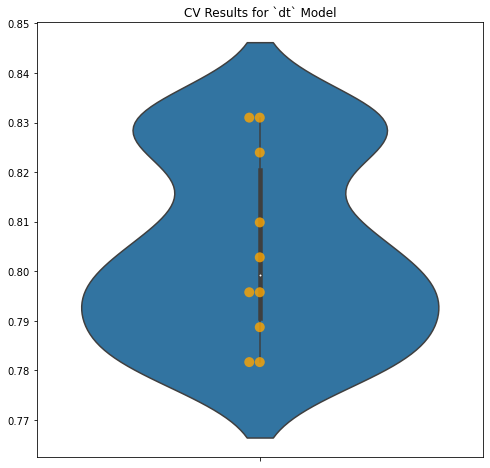

In [56]:
dt_model_pipe = ModelWithCV(
	dt_model_pipe,
	model_name='dt',
	X=X_train,
	y=y_train)

fig, ax = plt.subplots(figsize=(8,8))

dt_model_pipe.plot_cv(ax=ax);

Accuracy: 0.8258426966292135
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        83
           1       0.81      0.77      0.79       101
           2       0.81      0.84      0.83        76
           3       0.86      0.86      0.86        96

    accuracy                           0.83       356
   macro avg       0.82      0.83      0.83       356
weighted avg       0.83      0.83      0.83       356



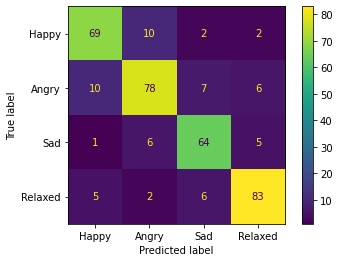

In [57]:
# Baseline Evaluation of the model
y_pred = dt_model_pipe.model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

Discussion:
- Although the decision tree model performed better than the baseline dummy model, it is likely overfitting the data and will require tuning to improve it's performance. We'll tune the model using GridSearchCV to find the optimal hyperparameters for the model IF we decide to use this model.

#### The Gradient Boosting Model

In [58]:
# Creates a Pipeline for the Decision Tree Model
gb_model_pipe = Pipeline(steps = [
	('ct',CT),
	('gb', GradientBoostingClassifier())
])

In [59]:
# Trains the logistic regression model
gb_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB0C8E6D0>)])),
                ('gb', GradientBoostingClassifier())])

In [60]:
# Returns the mean accuracy score of the model based on the given training data and labels
gb_model_pipe.score(X_train, y_train)

0.8676056338028169

In [61]:
# Returns the mean accuracy score of the model based on the given testing data and labels
gb_model_pipe.score(X_test, y_test)

0.7359550561797753

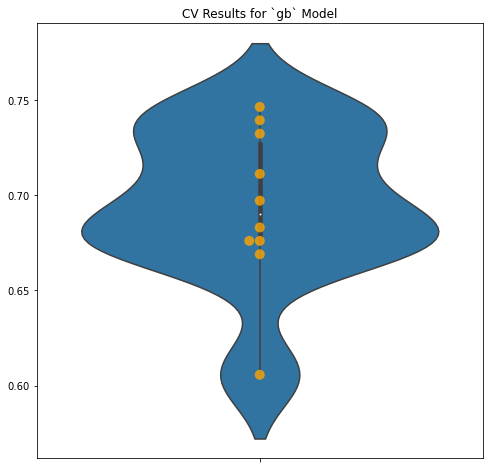

In [62]:
gb_model_pipe = ModelWithCV(
	gb_model_pipe,
	model_name='gb',
	X=X_train,
	y=y_train)

fig, ax = plt.subplots(figsize=(8,8))

gb_model_pipe.plot_cv(ax=ax);

Accuracy: 0.7359550561797753
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        83
           1       0.80      0.77      0.79       101
           2       0.68      0.71      0.70        76
           3       0.79      0.76      0.78        96

    accuracy                           0.74       356
   macro avg       0.73      0.73      0.73       356
weighted avg       0.74      0.74      0.74       356



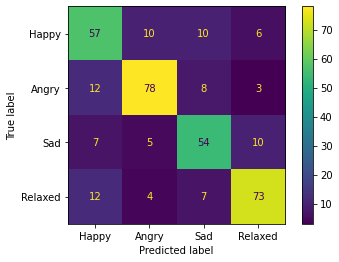

In [63]:
# Baseline Evaluation of the model
y_pred = gb_model_pipe.model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

Discussion:
- The gradient boosting model performed better than the baseline dummy model, but not as well as the decision tree model. We'll tune the model using GridSearchCV to find the optimal hyperparameters for the model IF we decide to use this model.

#### The Random Forest Model

In [151]:
# Creates a Pipeline for the Decision Tree Model
rf_model_pipe = Pipeline(steps = [
	('ct',CT),
	('rf', RandomForestClassifier())
])

In [146]:
# Trains the logistic regression model
rf_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB1E87E20>)])),
                ('rf', RandomForestClassifier())])

In [111]:
# Returns the mean accuracy score of the model based on the given training data and labels
rf_model_pipe.score(X_train, y_train)

0.9929577464788732

In [112]:
# Returns the mean accuracy score of the model based on the given testing data and labels
rf_model_pipe.score(X_test, y_test)

0.8820224719101124

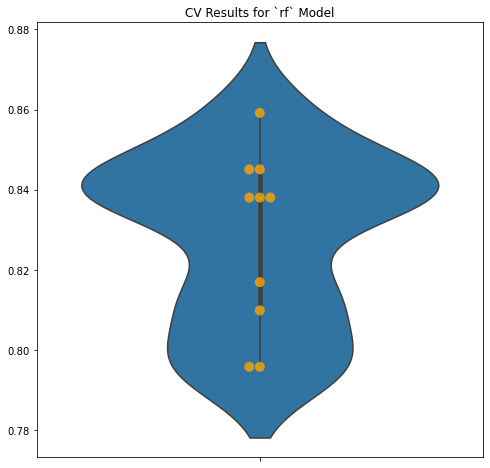

In [114]:
rf_model_pipe = ModelWithCV(
	rf_model_pipe,
	model_name='rf',
	X=X_train,
	y=y_train)

fig, ax = plt.subplots(figsize=(8,8))

rf_model_pipe.plot_cv(ax=ax);

Accuracy: 0.8820224719101124
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        83
           1       0.92      0.85      0.89       101
           2       0.90      0.91      0.90        76
           3       0.89      0.89      0.89        96

    accuracy                           0.88       356
   macro avg       0.88      0.88      0.88       356
weighted avg       0.88      0.88      0.88       356



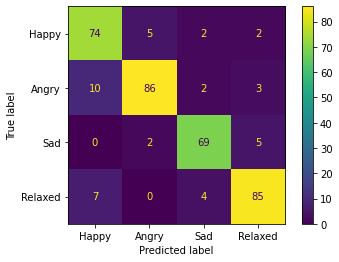

In [115]:
# Baseline Evaluation of the model
y_pred = rf_model_pipe.model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

***Discussion of Comparison of Model Results***
- Comparing the three models against the baseline dummy model, we can see that the random forest model performed the best, followed by the decision tree model, and then the gradiant boost model. Based on these results, we'll move forward with the random forest model and tune it using GridSearchCV to find the optimal hyperparameters for the model.

### Iterating on the Random Forest Model
- We've decided to move forward with the random forest model, and so we'll tune the hyperparameters of the random forest model to improve it's performance.

In [152]:
# For Reference: The Random Forest Model
rf_model_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB1E87E20>)])),
                ('rf', RandomForestClassifier())])

Because the ColumnTransformer is a pipeline, we can use it in a GridSearchCV object to find the best hyperparameters for our model.

Because we're using a random forest model, we'll need to tune the hyperparameters of the model to improve it's performance. We'll use a grid search to tune the hyperparameters of the model.

In [172]:
# Creates a list of parameters to be used in the GridSearchCV. Due to the large number of parameters, and cpu and time constraints, only a few are used here. The rest are commented out for convenience.
params = {}

params['rf__n_estimators'] = [100, 200, 300, 400, 500]
params['rf__criterion'] = ['gini', 'entropy','log_loss']
params['rf__max_depth'] = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# params['rf__min_samples_split'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# params['rf__min_samples_leaf'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# params['rf__min_weight_fraction_leaf'] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# params['rf__max_features'] = ['auto', 'sqrt', 'log2']
# params['rf__max_leaf_nodes'] = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# params['rf__min_impurity_decrease'] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# params['rf__bootstrap'] = [True, False]
# params['rf__oob_score'] = [True, False]
# params['rf__n_jobs'] = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# params['rf__random_state'] = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# params['rf__verbose'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# params['rf__warm_start'] = [True, False]
# params['rf__class_weight'] = ['balanced', 'balanced_subsample', None]
# params['rf__ccp_alpha'] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# params['rf__max_samples'] = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [176]:
gs = GridSearchCV(estimator=rf_model_pipe, param_grid=params, cv=5, verbose=1, n_jobs=-1)

In [177]:
gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_numerics',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB1E87E20>)])),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'rf__n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [178]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   20.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_numerics',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB1E87E20>)])),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'rf__n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [179]:
gs.best_params_

{'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__n_estimators': 300}

In [180]:
gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025FB3057790>)])),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=300))])

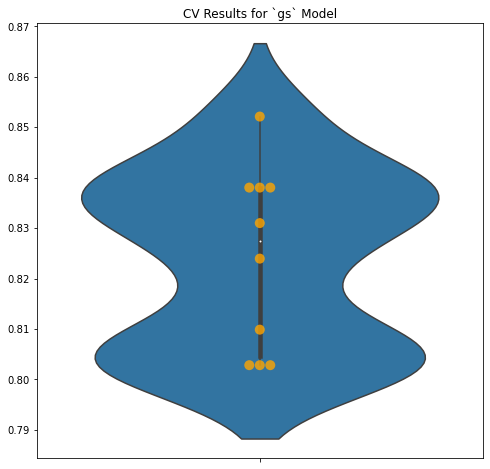

In [181]:
gs_pipe = ModelWithCV(
    gs.best_estimator_,
    model_name='gs',
    X=X_train,
    y=y_train)
fig, ax = plt.subplots(figsize=(8,8))

gs_pipe.plot_cv(ax=ax);

Accuracy: 0.8764044943820225
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        83
           1       0.89      0.86      0.87       101
           2       0.88      0.91      0.90        76
           3       0.92      0.89      0.90        96

    accuracy                           0.88       356
   macro avg       0.88      0.88      0.88       356
weighted avg       0.88      0.88      0.88       356



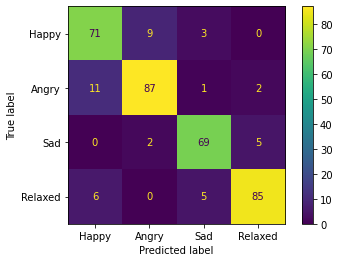

In [182]:
# Tuned Evaluation of the model
y_pred = gs_pipe.model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

## Evaluation

The baseline dummy model had an accuracy score of 0.25, meaning that the model correctly predicted the dominant mood of a song only 25% of the time. The baseline random forest model had an accuracy score of 0.88, meaning that the model correctly predicted the dominant mood of a song 88% of the time. Because the baseline random forest model performed better than any of the other models, the author moved forward with the random forest model. After tuning the hyperparameters of the random forest model further, an accuracy score of 0.89 was achieved, meaning that the model correctly predicted the dominant mood of a song 89% of the time.

## Conclusions
Based on the analysis, the author recommends the use of audio feature data to predict the dominant mood of a song. Due to the ease and accuracy of detecting the dominant mood of a song based on its audio features, the author recommends that Spotify integrate a mood detection model into their current recommendation system to allow users to request music based on their current mood. Limitations of the study include the use of user-generated tags to determine the dominant mood of a song, and the use of audio features that are proprietary to the Spotify API. Future work could include the use of a larger dataset, more audio features included in the analysis, the inclusion of more mood classes, sentiment analysis of song lyrics to strengthen model accuracy, and the use of a more robust model.